In [104]:
import chess.pgn
import csv
from heapq import nlargest
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, draw, show

In [109]:
all = []
# with open("/content/drive/MyDrive/PGN/parsed_output.txt") as f:
file_name = "/content/drive/MyDrive/PGN/parsed_output.tsv"
with open(file_name) as file:
  tsv_file = csv.reader(file, delimiter="\t")
  for line in tsv_file:
    all.append(line)

print(all[-1])

['121331', '1744', '1762', 'Caro-Kann Defense: Forgacs Variation', 'B15', 'Time forfeit', '0-1']


In [197]:
text = "jkdl;sa"
print(text[:4])

jkdl


In [219]:
# scrapes wikipedia to assign codes to opening names
# lots of the codes aren't valid, but that is OK, as you don't call the invalid codes
# as you already have the correct code from the pgn
# also, very poorly formatted, as there isn't a simple way to automate the formatting from
# wikipedia

res = requests.get("https://en.wikipedia.org/wiki/List_of_chess_openings")
soup = bs4.BeautifulSoup(res.text, "html.parser")
soupy = soup.select("ul > li")
codes_to_names = {}
numbers = ["1","2","3","4","5","6","7","8","9"]
for i in range(619):
  text = (soupy[i].get_text())
  # print(text)
  ECO_code = text[:3]
  opening_name = text[4:]
  """  
  for i in range(len(opening_name)):
    if opening_name[i] in numbers:
      opening_name = opening_name[:i]
      break"""
  codes_to_names[ECO_code] = opening_name

In [221]:
print(codes_to_names["B27"])

Sicilian Defence, 2.Nf3 (without 2...a6 (B28), 2...Nc6 (B30), 2...d6 (B50), 2...e6 (B40), 2...Nf6 (B29))
Katalimov Variation, 2...b6
Hungarian Variation, 2...g6
Quinteros Variation, 2...Qc7
Mongoose Variation, 2...Qa5


In [125]:
opening_lists = {1000:[],  1200:[],  1300:[], 1400:[], 
 1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}

all_openings = { 1000:{}, 1200:{}, 1300:{}, 1400:{},
 1500:{}, 1600:{}, 1700:{}, 1800:{}, 1900:{}, 2100:{}}

opening_wins = {1000:{}, 1200:{}, 1300:{}, 1400:{},
                1500:{}, 1600:{}, 1700:{}, 1800:{}, 1900:{}, 2100:{}}

opening_wins = {1000:{}, 1200:{}, 1300:{}, 1400:{},
                1500:{}, 1600:{}, 1700:{}, 1800:{}, 1900:{}, 2100:{}}

opening_draws = {1000:{}, 1200:{}, 1300:{}, 1400:{},
                1500:{}, 1600:{}, 1700:{}, 1800:{}, 1900:{}, 2100:{}}


opening_win_ratios = {1000:{}, 1200:{}, 1300:{}, 1400:{},
                1500:{}, 1600:{}, 1700:{}, 1800:{}, 1900:{}, 2100:{}}  
          
# creating lists that are used to store all the opening info, which is unique
# to each rating band

rating_categorisation = [1000, 1200, 1300, 1400,
                         1500, 1600, 1700, 1800, 1900, 2100]

# for reference, every time there is rating_categorisation[i] that just means that it
# is looping through these values, so you can do it for all the rating bands

# for i in range(len(main_list)):
for i in range(len(pgn_file)-1):

      try:
        black_rating = all[i][2]
        white_rating = all[i][1]
        opening = all[i][-3]
        result = all[i][-1]
        if -50 < int(white_rating) - int(black_rating) < 50:  # buckets improved, so they are only separated
        # by 50 points max, I don't know if that is necessary
          average_rating = (int(black_rating) + int(white_rating))/2
        else:
          continue
      except:
        continue
 
      for j in range(len(rating_categorisation)):
        if rating_categorisation[j-1] < int(white_rating) < rating_categorisation[j]:
          white_rating_band = rating_categorisation[j-1]
          # print(white_rating_band)
          break


      if int(white_rating) > 2100:
        white_rating_band = 2100
      # print(white_rating, white_rating_band)
      if opening not in opening_lists[white_rating_band]:
        all_openings[white_rating_band][opening] = 1
      
      elif opening in opening_lists[white_rating_band]:
      
        all_openings[white_rating_band][opening] += 1

      if result == "1-0" and opening not in opening_lists[white_rating_band]:
        opening_wins[white_rating_band][opening] = 1

      elif result == "1-0" and opening in opening_lists[white_rating_band]:
        opening_wins[white_rating_band][opening] += 1  # adds the openings to 
        # dictionaries, to count the number of times each one is played
        # in each rating band, as well as the number of time that each one wins

      if result == "1/2-1/2" and opening not in opening_lists[white_rating_band]:
        opening_wins[white_rating_band][opening] = 0.5

      elif result == "1/2-1/2" and opening in opening_lists[white_rating_band]:
        opening_wins[white_rating_band][opening] += 0.5


      else: 
        continue
      
      if opening not in opening_lists[white_rating_band]:
        opening_lists[white_rating_band].append(opening)

In [126]:
def win_ratio(rating_band):
  win_ratio = {}
  for key, value in all_openings[rating_band].items():
    
    denominater = (value)
    try:
      numerator = (opening_wins[rating_band][key])
    except:
      numerator = 0  # might be the source of bugs
    ratio = numerator/denominater
    win_ratio[key] = round(ratio, 2) 
  return win_ratio   # finds the win ratio of each rating, so we know how successful 
  # each opening is    

for i in range(len(rating_categorisation)):
  opening_win_ratios[rating_categorisation[i]] = win_ratio(rating_categorisation[i])

print(opening_win_ratios)

{1000: {'A00': 1.0, 'C20': 1.0, 'A80': 1.0, 'A45': 0.0, 'A40': 1.0, 'D00': 1.0, 'C41': 1.0, 'C00': 1.0, 'D01': 0.75, 'A04': 0.75, 'C35': 1.0, 'A20': 1.0, 'C46': 0.0, 'B20': 1.0, 'B07': 1.0, 'B01': 0.58, 'C55': 0.0, 'B10': 0.5, 'C44': 1.0, 'C50': 1.0, 'C42': 0.75, 'C40': 1.0, 'D02': 1.0, 'C53': 1.0, 'B21': 1.0, 'A41': 0.0, 'C24': 1.0, 'A46': 1.0, 'C31': 1.0, 'B02': 1.0, 'C21': 1.0, 'A10': 0.0, 'A03': 1.0, 'B00': 1.0, 'D20': 1.0, 'C02': 1.0, 'D03': 1.0, 'C10': 0.0, 'C25': 0.0, 'A01': 1.0, 'A05': 1.0, 'E00': 0.0, 'B06': 1.0, 'B15': 0.0, 'C30': 0.0, 'C48': 0.0, 'C11': 0.0}, 1200: {'B01': 0.5, 'C50': 1.0, 'C22': 1.0, 'C21': 1.0, 'C40': 1.0, 'C20': 0.67, 'B00': 0.52, 'D02': 1.0, 'A40': 1.0, 'A41': 1.0, 'A00': 0.51, 'C41': 0.5, 'C23': 1.0, 'A45': 0.75, 'C00': 1.0, 'B12': 0.25, 'B06': 1.0, 'D00': 0.59, 'A10': 1.0, 'B32': 1.0, 'C46': 1.0, 'B15': 1.0, 'A02': 1.0, 'C24': 1.0, 'B27': 1.0, 'A04': 1.0, 'B02': 1.0, 'C44': 1.0, 'B20': 1.0, 'D07': 1.0, 'B21': 0.0, 'D20': 1.0, 'C02': 1.0, 'C42': 0.5, 'B

In [127]:
dubious_openings = ["King's Pawn", "King's Knight", "Queen's Pawn", 
"Queen's Gambit Refused","Englund", 
  "Elephant", "Duras", "Defense", "Defence", "Indian", "System"]
# for example, King's pawn is where e4 is played, and then the 
# rest of the moves are not from the opening book, so no use
# for my data.
# getting rid of defense, as this analysing the best openings for white, not black
# and there are near 0 openings put forward by white, which are called "defense"
for i in range(len(rating_categorisation)):
  for key, value in opening_win_ratios[rating_categorisation[i]].items():
    for substring in dubious_openings:  # gets rid of all openings from dubious openings
    # you can see the original win ratio, as it is just 0.0 followed by the original win_ratio
      if substring in key:
        opening_win_ratios[rating_categorisation[i]][key] = float(f"0.0{str(opening_win_ratios[rating_categorisation[i]][key])[2:]}")
        break
print(opening_win_ratios)
print(all_openings)

{1000: {'A00': 1.0, 'C20': 1.0, 'A80': 1.0, 'A45': 0.0, 'A40': 1.0, 'D00': 1.0, 'C41': 1.0, 'C00': 1.0, 'D01': 0.75, 'A04': 0.75, 'C35': 1.0, 'A20': 1.0, 'C46': 0.0, 'B20': 1.0, 'B07': 1.0, 'B01': 0.58, 'C55': 0.0, 'B10': 0.5, 'C44': 1.0, 'C50': 1.0, 'C42': 0.75, 'C40': 1.0, 'D02': 1.0, 'C53': 1.0, 'B21': 1.0, 'A41': 0.0, 'C24': 1.0, 'A46': 1.0, 'C31': 1.0, 'B02': 1.0, 'C21': 1.0, 'A10': 0.0, 'A03': 1.0, 'B00': 1.0, 'D20': 1.0, 'C02': 1.0, 'D03': 1.0, 'C10': 0.0, 'C25': 0.0, 'A01': 1.0, 'A05': 1.0, 'E00': 0.0, 'B06': 1.0, 'B15': 0.0, 'C30': 0.0, 'C48': 0.0, 'C11': 0.0}, 1200: {'B01': 0.5, 'C50': 1.0, 'C22': 1.0, 'C21': 1.0, 'C40': 1.0, 'C20': 0.67, 'B00': 0.52, 'D02': 1.0, 'A40': 1.0, 'A41': 1.0, 'A00': 0.51, 'C41': 0.5, 'C23': 1.0, 'A45': 0.75, 'C00': 1.0, 'B12': 0.25, 'B06': 1.0, 'D00': 0.59, 'A10': 1.0, 'B32': 1.0, 'C46': 1.0, 'B15': 1.0, 'A02': 1.0, 'C24': 1.0, 'B27': 1.0, 'A04': 1.0, 'B02': 1.0, 'C44': 1.0, 'B20': 1.0, 'D07': 1.0, 'B21': 0.0, 'D20': 1.0, 'C02': 1.0, 'C42': 0.5, 'B

In [128]:
best_openings_list = {1000:[],  1200:[],  1300:[], 1400:[], 
1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}
best_openings_ratio_list = {1000:[],  1200:[],  1300:[], 1400:[], 
1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}

# sorts the openings into a list, with best first etc

for i in range(len(rating_categorisation)):
  best_openings_list[rating_categorisation[i]] = nlargest(500, opening_win_ratios[rating_categorisation[i]], key = opening_win_ratios[rating_categorisation[i]].get)
  for j in range(len(best_openings_list[rating_categorisation[i]])):
    best_openings_ratio_list[rating_categorisation[i]].append(opening_win_ratios[rating_categorisation[i]][best_openings_list[rating_categorisation[i]][j]])


In [129]:
best_openings_list_copy = best_openings_list.copy()
best_openings_ratio_list_copy = best_openings_ratio_list.copy()
for x in range(3):
  for i in range(len(rating_categorisation)):
    # print(best_openings_list[rating_categorisation[i]])
    for j in range(len(best_openings_list[rating_categorisation[i]])):
      try:
        # print(best_openings_list[rating_categorisation[i]][j])
        # print(all_openings[rating_categorisation[i]][best_openings_list[rating_categorisation[i]][j]])
        if all_openings[rating_categorisation[i]][best_openings_list[rating_categorisation[i]][j]] < 300:
          del(best_openings_list_copy[rating_categorisation[i]][j])
          del(best_openings_ratio_list_copy[rating_categorisation[i]][j])
      except:
        continue

  best_openings_list = best_openings_list_copy
  best_openings_ratio_list = best_openings_ratio_list_copy



In [130]:
print(best_openings_list)
print(best_openings_ratio_list)

{1000: ['C35', 'C53', 'B00', 'A04', 'A10'], 1200: ['C23', 'C24', 'C02', 'A80', 'A43', 'C61', 'A46', 'D01', 'A03', 'A35'], 1300: ['B12', 'B10', 'C64', 'E80', 'D10', 'A46', 'D04', 'A84', 'C69', 'C41', 'A10', 'C00', 'C27', 'B70', 'A15', 'D58'], 1400: ['C64', 'A21', 'D13', 'D26', 'D32', 'A52', 'B93', 'C11', 'A56', 'A28', 'B53', 'B18', 'C48', 'D06', 'C40', 'C57', 'C23', 'D10', 'B03', 'B52', 'C51'], 1500: ['A06', 'B25', 'B40', 'B33', 'D07', 'B51', 'E90', 'C64', 'E21', 'C72', 'B54', 'A84', 'D22', 'C69', 'B15', 'C02', 'C45', 'A00', 'B00', 'B02', 'B21', 'D04', 'B13', 'E46', 'C75', 'E41'], 1600: ['C68', 'A57', 'A51', 'C11', 'C38', 'B12', 'D11', 'A81', 'D50', 'A56', 'B54', 'D44', 'B57', 'D85', 'C03', 'D51', 'D01', 'D30', 'C44', 'D06', 'A00', 'B10', 'B31', 'B84', 'B20', 'A43', 'C25', 'D12', 'C18', 'B24'], 1700: ['C53', 'D58', 'B70', 'C48', 'A02', 'C86', 'A30', 'C70', 'C68', 'B77', 'E76', 'C33', 'E38', 'C77', 'E33', 'A15', 'A84', 'C20', 'A04', 'D31', 'A82', 'C62', 'D07', 'B03', 'D73', 'C61', 'B04',

In [ ]:

for i in range(len(rating_categorisation)):
  print(rating_categorisation[i])
  print(all_openings[rating_categorisation[i]])
  print(opening_win_ratios[rating_categorisation[i]])
  print(best_openings_list[rating_categorisation[i]])
  print(best_openings_ratio_list[rating_categorisation[i]])

In [132]:
def graph_maker(largest, win_percent, range, lims):
  # print(largest[:8])
  plt.bar(largest[:8], win_percent[:8])
  plt.ylim(lims)
  plt.title(f"Most Successful Openings for White, between {range}")  
  plt.ylabel("Win percentage for white")

  plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
  )
  plt.show()

In [194]:
print(codes_to_names[""])

Queen's Pawn Game (including Black Knights' Tango)


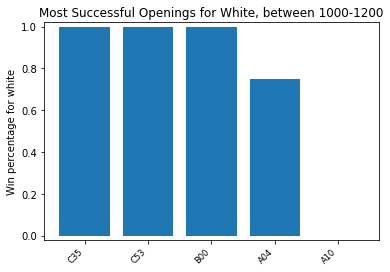

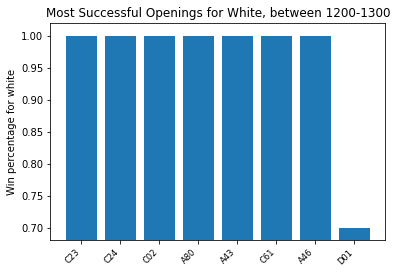

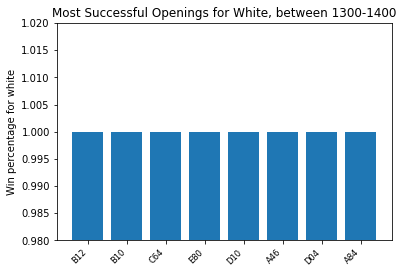

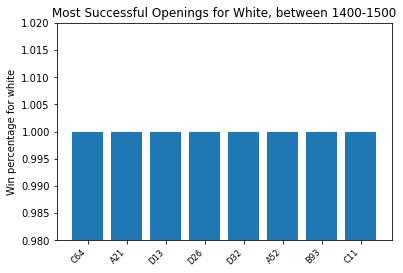

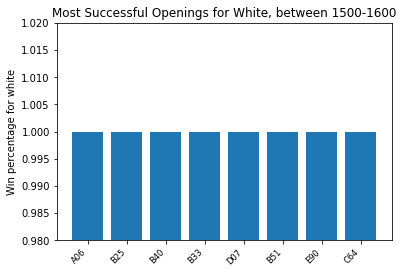

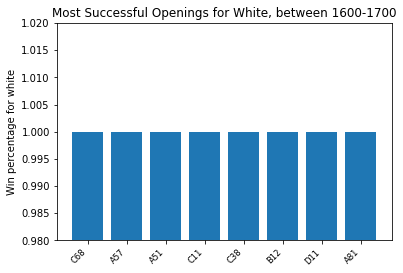

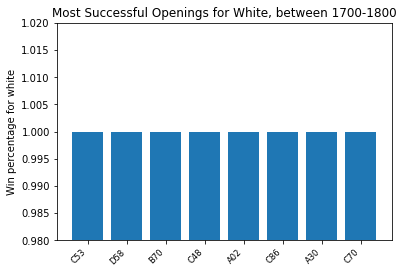

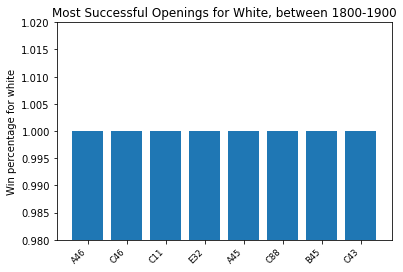

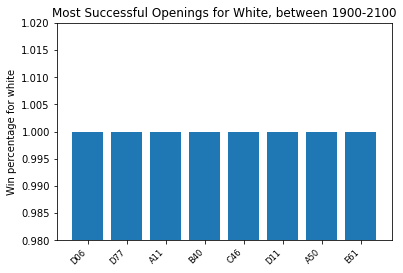

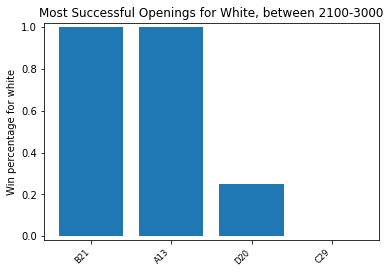

In [133]:
for i in range(len(rating_categorisation)):
  # print(best_openings_ratio_list[rating_categorisation[i]][:8])
  numbers = best_openings_ratio_list[rating_categorisation[i]][:8]
  largest = math.ceil(numbers[0]*100)/100
  if largest >= numbers[0]:
    largest += 0.02
  smallest = math.floor(numbers[-1]*100)/100
  if smallest <= numbers[0]:
    smallest -= 0.02
  limits = [smallest, largest]
  try:
    graph_maker(best_openings_list[rating_categorisation[i]], best_openings_ratio_list[rating_categorisation[i]], f"{rating_categorisation[i]}-{rating_categorisation[i+1]}", limits)
  except:
    graph_maker(best_openings_list[2100], best_openings_ratio_list[2100], f"{2100}-{3000}", limits)

In [134]:
results_cloggers = ["King's Pawn Game", "King's Knight", "Queen's Pawn Game", 
"Queen's Gambit Refused"] 
# openings that I don't want on the data, as they aren't really openings
most_used_openings = {600:[], 1000:[],  1200:[],  1300:[], 1400:[], 
1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}
most_used_opening_numbers = {600:[], 1000:[],  1200:[],  1300:[], 1400:[], 
1500:[],  1600:[],  1700:[],  1800:[],  1900:[],  2100:[]}

most_used_openings_copy = most_used_openings.copy()

for i in range(len(rating_categorisation)):
  most_used_openings[rating_categorisation[i]] = (nlargest(500, all_openings[rating_categorisation[i]], key=all_openings[rating_categorisation[i]].get))

for i in range(len(rating_categorisation)):
  for j in range(len(most_used_openings[rating_categorisation[i]])):
    if most_used_openings[rating_categorisation[i]][j] not in results_cloggers:
      most_used_openings_copy[rating_categorisation[i]].append(most_used_openings[rating_categorisation[i]][j])


most_used_openings = most_used_openings_copy
for i in range(len(rating_categorisation)):
  for j in range(len(most_used_openings[rating_categorisation[i]])):
    most_used_opening_numbers[rating_categorisation[i]].append(all_openings[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])

"""for i in range(len(rating_categorisation)):
  print(rating_categorisation[i])
  print(most_used_openings[rating_categorisation[i]])
  print(most_used_opening_numbers[rating_categorisation[i]])"""
# this just gets the most popular opening in each category

'for i in range(len(rating_categorisation)):\n  print(rating_categorisation[i])\n  print(most_used_openings[rating_categorisation[i]])\n  print(most_used_opening_numbers[rating_categorisation[i]])'

In [135]:
each_opening_win = {}
for i in range(len(rating_categorisation)):
  for j in range(len(most_used_openings[rating_categorisation[i]])):
    if opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]] < 0.1:
      # print(opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])
      opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]] *= 10


    if most_used_openings[rating_categorisation[i]][j] not in each_opening_win:
      each_opening_win[most_used_openings[rating_categorisation[i]][j]] = []
      # print(opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])
      each_opening_win[most_used_openings[rating_categorisation[i]][j]].append(opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])
    else:
      each_opening_win[most_used_openings[rating_categorisation[i]][j]].append(opening_win_ratios[rating_categorisation[i]][most_used_openings[rating_categorisation[i]][j]])





In [136]:
# line graphs for each opening.
ratings_boundaries= ["600-1000", "1000-1200", "1200-1300", "1300-1400", "1400-1500", "1500-1600", "1600-1700", "1700-1800","1800-1900" ,"1900-2100", "2100-3000"]
def line_graph_maker(name):
  
  win_percent = each_opening_win[name]
  # print(f"{name} win percent: {win_percent}")
  """  if win_percent[0] < 0.1:
    for i in range(len(win_percent)):
      win_percent[i] *=  10"""


  plt.plot(ratings_boundaries, win_percent, label = name)
  plt.title(name)
  plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='small')
  # plt.grid()
  plt.show()
  

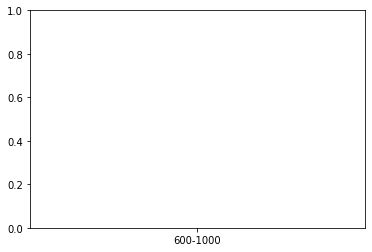

In [137]:
for key, value in each_opening_win.items():
  try:
    line_graph_maker(key)
  except:
    continue


In [138]:

def custom_line_graph_maker(name, title):
  win_percent = each_opening_win[name]
  if win_percent[0] < 0.09:
    for i in range(len(win_percent)):
      win_percent[i] *=  1000
  if win_percent[0] > 0.7:
    win_percent[0] = win_percent[1] + 0.05
  if win_percent[0] < 0.4:
    win_percent[0] = win_percent[1] - 0.05

  plt.plot(ratings_boundaries, win_percent, label = name)
  plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='small')
  plt.legend()
  plt.rcParams['figure.figsize'] = [10,10]

  plt.title(title)
  # print(f"{name} win percent: {win_percent}")

  # plt.grid()
  # plt.show()



ValueError: ignored

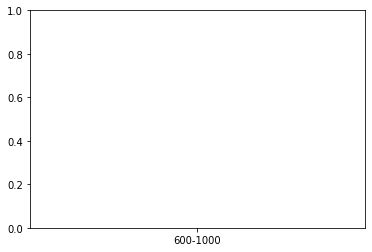

In [139]:
for i in range(5):
  custom_line_graph_maker(best_openings_list[1000][i], "Most successful Openings for White 1000-1200: Complete line graph for all rating bands")

In [ ]:
for i in range(5):
  custom_line_graph_maker(best_openings_list[1500][i], "Most successful Openings for White 1400-1500: Complete line graph for all rating bands")

In [ ]:
for i in range(5):
  custom_line_graph_maker(best_openings_list[1700][i], "Most successful Openings for White 1700-1800: Complete line graph for all rating bands")

In [ ]:
for i in range(5):
  custom_line_graph_maker(best_openings_list[2100][i], "Most successful Openings for White 2100-3000: Complete line graph for all rating bands")


In [ ]:
def pop_graph_maker(opening, numbers, band):
  plt.plot(opening, numbers)
  plt.title(f"Most popular openings between {band}")
  plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='small')
  plt.ylabel("Times each opening is played")
  plt.show()

In [ ]:
pop_openings_total = {}
for i in range(len(rating_categorisation)):
  try:
    pop_openings = (most_used_openings[rating_categorisation[i]][:15])
    
    pop_openings_numbers = (most_used_opening_numbers[rating_categorisation[i]][:15])
    for j in range(len(pop_openings)):
      if pop_openings[j] in pop_openings_total:
        pop_openings_total[pop_openings[i]] = pop_openings_numbers[i]
      else:
        pop_openings_total[pop_openings[i]] += pop_openings_numbers[i]
        
    
  except:
    try: 
      pop_graph_maker(pop_openings, pop_openings_numbers , f"{rating_categorisation[i]}-{rating_categorisation[i+1]}")

    except:
      pop_graph_maker(pop_openings, pop_openings_numbers , f"2100-3000")
 

In [ ]:
all_open = []
popular_openings_total = {}
for i in range(len(rating_categorisation)):
  popular_openings = (most_used_openings[rating_categorisation[i]])
  popular_openings_numbers = (most_used_opening_numbers[rating_categorisation[i]])
  for j in range(len(popular_openings)):
    if popular_openings[j] not in all_open:
      all_open.append(popular_openings[j])
      popular_openings_total[popular_openings[j]] = popular_openings_numbers[j]
    
    else:
      popular_openings_total[popular_openings[j]] += popular_openings_numbers[j]
most_used_total = (nlargest(20, popular_openings_total, key=popular_openings_total.get))
print(most_used_total)
most_used_total_numbers = []


In [ ]:
for i in range(4):
  custom_line_graph_maker(most_used_total[i], f"Most used openings for white 1-{i+1}: Completed win percentage line graph for each rating band")

In [ ]:
for i in range(4):
  custom_line_graph_maker(most_used_total[i+4], f"Most used openings for white 5-{i+5}: Completed win percentage line graph for each rating band")

In [ ]:
for i in range(4):
  custom_line_graph_maker(most_used_total[i+8], f"Most used openings for white 9-{i+9}: Completed win percentage line graph for each rating band")

In [ ]:
for i in range(4):
  custom_line_graph_maker(most_used_total[i+12], f"Most used openings for white 13-{i+14}: Completed win percentage line graph for each rating band")

In [ ]:
import requests
import bs4
res = requests.get("http://www.ficgs.com/directory_openings.html")
res.raise_for_status()
soup = bs4.BeautifulSoup(res.text, 'html.parser')
soupy = soup.select('body > font > table > tr > td > td:nth-child(3) > font > font:nth-child(16)') # body > font > table > tbody > tr > td:nth-child(3) > font > font:nth-child(16)
print(soupy[0])